# Monte Carlo Simulations

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Invest C0 = 1000 in an asset for 1 year.  

Historical mean return = 9 %  
Historical return stdev = 12 %  

In [2]:
C0 = 1000

r_mean = 9/100
r_std = 12/100

### 1. Monte Carlo Simulation Analysis to evaluate the investment after 1 year

#### Modelisation

##### Deterministic model

C1 = (1 + r_0_1) * C0  

where:
 - C1 = amount of investement after 1 year  
 - r_0_1: rate of return from t = 0 to t = 1 year  

##### Random Variables

<u>r_0_1</u> is the input random variable of the model.  
<u>name, " </u> is the output random variable of the model.  

##### Assumptions

The rate of return, r_0_1, is normal => N(mu, sigma) where:  
- mu = historical mean return  
- sigma = historical return stdev

#### Simulation

The input variable r_0_1 is normal, therefore it can be simulated by drawing random numbers from the given normal distribution.  

By using the deterministic formula (C1 = (1 + r_0_1)*C0), the distribution of the output variable C1 can be derived.

In [3]:
# Simulate r_0_1
n_simuls = 1000
r_0_1 = np.random.normal(loc = r_mean, scale = r_std, size = n_simuls)
print("r_0_1 distribution =>\n")
for i in range(10):
    print("\t-", i, "=>", round(r_0_1[i],5))


r_0_1 distribution =>

	- 0 => 0.09149
	- 1 => -0.01658
	- 2 => 0.0474
	- 3 => -0.04584
	- 4 => 0.08969
	- 5 => 0.03045
	- 6 => 0.14072
	- 7 => 0.04083
	- 8 => -0.04866
	- 9 => -0.08392


In [4]:
# Derive C1
C1 = (1 + r_0_1)*C0

print("C1 distribution =>\n")
for i in range(10):
    print("\t-", i, "=>", round(C1[i], 4))

C1 distribution =>

	- 0 => 1091.4859
	- 1 => 983.4248
	- 2 => 1047.3954
	- 3 => 954.1596
	- 4 => 1089.6926
	- 5 => 1030.4531
	- 6 => 1140.7192
	- 7 => 1040.8279
	- 8 => 951.3435
	- 9 => 916.0841


Compute the C1 descriptive statistics

In [5]:
def print_stats(x, name):
    print()
    print(name, "mean ..................... = ", round(x.mean(), 4))
    print(name, "std ...................... = ", round(x.std(),4))
    print(name, "skew...................... = ", round(st.skew(x),4))
    print(name, "kurt...................... = ", round(st.kurtosis(x),4))
    print(name, "mode...................... = ", round(st.mode(x)[0],4))

    print()
    print(name, "5 percentile ............. = ", round(np.percentile(x, 5), 4))
    print(name, "50 percentile ............ = ", round(np.percentile(x, 50), 4))
    print(name, "95 percentile ............ = ", round(np.percentile(x, 95), 4))

    print()
    print(name, "min ...................... = ", round(x.min(), 4))
    print(name, "max ...................... = ", round(x.max(), 4))

    CI = st.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=st.sem(x))
    print()
    print(name, "lower boundary............ = ", round(CI[0], 4))
    print(name, "upper boundary............ = ", round(CI[1], 4))


In [6]:
print_stats(C1, "C1")


C1 mean ..................... =  1094.3022
C1 std ...................... =  118.6653
C1 skew...................... =  -0.0173
C1 kurt...................... =  -0.1069
C1 mode...................... =  701.5741

C1 5 percentile ............. =  896.4774
C1 50 percentile ............ =  1096.2223
C1 95 percentile ............ =  1290.9726

C1 min ...................... =  701.5741
C1 max ...................... =  1475.8017

C1 lower boundary............ =  1086.9348
C1 upper boundary............ =  1101.6697


C1 distribution

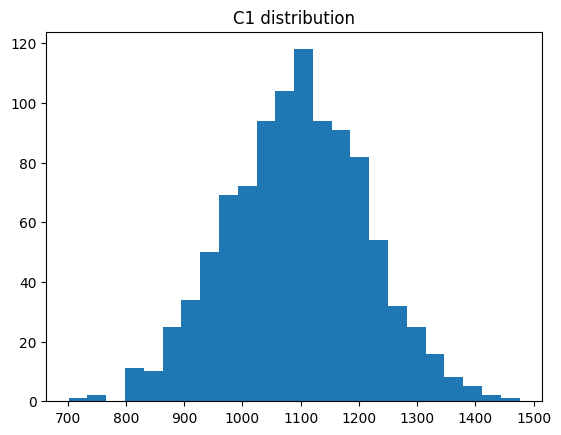

In [7]:
plt.hist(C1, bins='auto')
plt.title("C1 distribution")
plt.show()

The C1 distribution looks like a normal distribution.  
This is expected Since C1 = (1 + r_0_1)*C0, and since r_0_1 is normal.

### 2. Monte Carlo Simulation Analysis to evaluate the investment after 30 years

#### Modelisation

##### Deterministic model

C30 = = (1 + r30) * C0

where:
 - C30 = amount of investement after 30 years  
 - r30 : rate of return from t = 0 to t = 30th year  

Using the successive annual return, r30 can be rewritten this way:

r30 = (1 + r_0_1) * (1 + r_1_2) * ... * (1 + r_29_30) * C0 - 1  
    
where:
 - r_n_(n+1): rate of return from t = nth year to t = (n+1)th year  

##### Random Variables

The <u>r_n_(n+1)</u> variables are the input random variables of the model.  
C30 is the only output random variable of the model.  

##### Assumptions

All the rates of return, r_n_(n+1), are independent of each other.  
Moreover they're all having the same normal distribution => N(mu, sigma) where:  
- mu = historical mean return  
- sigma = historical return stdev

#### Simulation

The input variables r_n_(n+1) are normal and independent, therefore they can be independently simulated by drawing random numbers from the given normal distribution.  

By using the deterministic formulas:
 - r30 = (1 + r_0_1) * (1 + r_1_2) * ... * (1 + r_29_30) * C0 - 1  
 - C30 = = (1 + r30) * C0
 
 the distribution of the output variable C30 can be derived.

In [8]:
# Simulate r_n_n1 (= r_n_(n+1))
n_simuls = 1000
n_years = 30
r_n_n1 = np.random.normal(loc = r_mean, scale = r_std, size = (n_years, n_simuls))
print("r_n_n1 distribution =>\n")
for i in range(10):
    print("\t-", i, "=>", r_n_n1[i][0:5])

r_n_n1 distribution =>

	- 0 => [ 0.23717879  0.15224875  0.28691522 -0.03428626 -0.02257801]
	- 1 => [-0.09143683  0.33919897  0.17032128  0.10555861 -0.00253619]
	- 2 => [0.1208389  0.1482292  0.07995464 0.34629897 0.04076757]
	- 3 => [ 0.18615956  0.19568374  0.12889155 -0.09671336 -0.05286715]
	- 4 => [ 0.02252161 -0.06835958 -0.09238568 -0.12565704  0.01914381]
	- 5 => [ 0.40451404  0.07769532  0.2051428  -0.01463215 -0.06837801]
	- 6 => [ 0.06538902  0.0958447   0.19908247 -0.11231151  0.49320186]
	- 7 => [ 0.01121592  0.02715054 -0.08773495  0.09895663 -0.04151204]
	- 8 => [-0.07512565  0.0790617   0.03381051  0.13528177  0.21799251]
	- 9 => [0.21592779 0.00226646 0.25136195 0.09987687 0.0606064 ]


In [9]:
# Derive r_30_plus_1 (= r_30 + 1 = product of all (1 + r_n_n1))
r_30_plus_1 = np.prod(1 + r_n_n1, axis = 0)

# Derive C30
C30 = r_30_plus_1 * C0

print("C30 distribution =>\n")
for i in range(10):
    print("\t-", i, "=>", round(C30[i], 4))

C30 distribution =>

	- 0 => 18171.363
	- 1 => 6433.1043
	- 2 => 27941.3678
	- 3 => 9846.0662
	- 4 => 9505.3665
	- 5 => 9859.3097
	- 6 => 9137.8839
	- 7 => 14828.4543
	- 8 => 35739.0734
	- 9 => 4742.3274


In [10]:
print_stats(C30, "C30")


C30 mean ..................... =  13066.9826
C30 std ...................... =  9055.6775
C30 skew...................... =  2.8569
C30 kurt...................... =  15.1532
C30 mode...................... =  1757.7124

C30 5 percentile ............. =  4228.5794
C30 50 percentile ............ =  10994.4334
C30 95 percentile ............ =  29629.8689

C30 min ...................... =  1757.7124
C30 max ...................... =  95678.6698

C30 lower boundary............ =  12504.7542
C30 upper boundary............ =  13629.211


C30 distribution

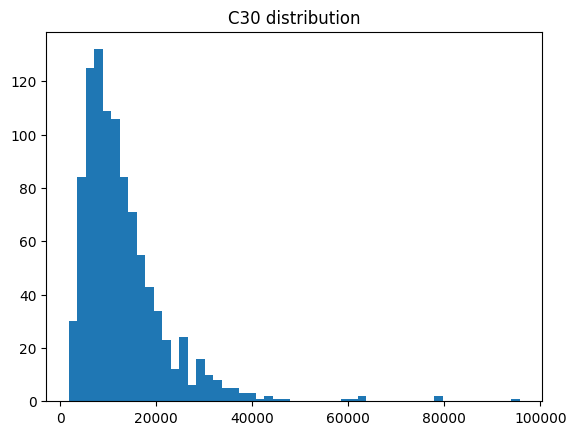

In [11]:
plt.hist(C30, bins='auto')
plt.title("C30 distribution")
plt.show()

The C30 is very skewed and does not look like a normal distribution at all, although each individual return, r_n_n1, is normal.

### 3. Monte Carlo Simulation Analysis to evaluate a portfolio of 2 correlated assets after 30 years

Let's consider another asset with these characteritics:  

r_mean2 = 4%  
r_std2 = 7%  

Let's assume that the correlation between the 2 assets is:  

correl = -0.2

The portfolio consists now of a 50/50 split of both assets.
In other words:  
 - 0.5 * C0 are invested in asset 1  
 - 0.5 * C0 are invested in asset 2  

The final value of the portfolio is the sum of the final value of the investment in each asset.

#### Modelisation

The returns of asset 1 and asset 2 follow a multivariate normal distribution with the specified correlation.  

For each asset, the modelisation is the same as in the previous case (1 ear).  

At the end, both amounts are added.

#### Implementation of the correlation between the 2 assets

Because the 2 assets are not independent, the corresponding random return must be drawn together.  
To do so, the covariance matrix of the 2 assets is needed.



In [12]:
r_mean2 = 4/100
r_std2 = 7/100

correl = -0.2

n_simuls = 1000
n_years = 30

# group the means
r_means = [r_mean, r_mean2]

print("means =>", r_means)

means => [0.09, 0.04]


In [13]:
# var + cov + cov matrix
var = r_std**2
var2 = r_std2**2
cov = correl*r_std*r_std2

covariance_matrix = np.array([
        [ var, cov  ],
        [ cov, var2 ]
    ])

print("covariance_matrix =>\n")
print(covariance_matrix)

covariance_matrix =>

[[ 0.0144  -0.00168]
 [-0.00168  0.0049 ]]


In [14]:
# Simulate 2 correlated random
n_simuls = 1000
correlated_returns = np.random.multivariate_normal(r_means, covariance_matrix, n_simuls)

print("correlated_returns distribution =>\n")
for i in range(10):
    print("\t-", i, "=>", round(correlated_returns[i][0], 4), "\t", round(correlated_returns[i][1], 4))


correlated_returns distribution =>

	- 0 => 0.2428 	 0.0288
	- 1 => 0.0981 	 -0.0322
	- 2 => 0.0411 	 0.0083
	- 3 => 0.0975 	 0.0609
	- 4 => 0.0461 	 0.0079
	- 5 => 0.0816 	 -0.0451
	- 6 => 0.1541 	 0.05
	- 7 => 0.0018 	 0.0396
	- 8 => 0.0378 	 -0.0153
	- 9 => 0.2603 	 0.0707


In [15]:
C1_per_asset = 0.5 * C0 * (1 + correlated_returns)

print("C1_per_asset =>\n")
for i in range(10):
    print("\t-", i, "=>", round(C1_per_asset[i][0], 4), "\t", round(C1_per_asset[i][1], 4))

C1_per_asset =>

	- 0 => 621.3901 	 514.393
	- 1 => 549.0478 	 483.8824
	- 2 => 520.5363 	 504.1418
	- 3 => 548.7579 	 530.4388
	- 4 => 523.07 	 503.9295
	- 5 => 540.789 	 477.451
	- 6 => 577.0459 	 525.0231
	- 7 => 500.9058 	 519.8118
	- 8 => 518.8907 	 492.3256
	- 9 => 630.1549 	 535.3502


In [16]:
C1 = np.sum(C1_per_asset, axis=1)

print("C1 distribution =>\n")
for i in range(10):
    print("\t-", i, "=>", round(C1[i], 4))

C1 distribution =>

	- 0 => 1135.783
	- 1 => 1032.9301
	- 2 => 1024.6782
	- 3 => 1079.1967
	- 4 => 1026.9994
	- 5 => 1018.2401
	- 6 => 1102.069
	- 7 => 1020.7175
	- 8 => 1011.2164
	- 9 => 1165.5051


To compute the value of the portfolio after 30 years, each investment has to be handled separately.  
The sum is then done at the end, when each distribution is available.  

It is assumed that the correlation remains constant over the years.

In [17]:
n_simuls = 1000
n_years = 30

return_asset1 = np.ones(n_simuls)
return_asset2 = np.ones(n_simuls)

for year in range(n_years):
    correlated_returns = np.random.multivariate_normal(r_means, covariance_matrix, n_simuls)
    return_asset1 = return_asset1 * (1 + correlated_returns[:,0])
    return_asset2 = return_asset2 * (1 + correlated_returns[:,1])

print("Returns per asset =>\n")
for i in range(10):
    print("\t-", i, "=>", round(return_asset1[i], 4), "\t", round(return_asset2[i], 4))

Returns per asset =>

	- 0 => 8.0873 	 2.3381
	- 1 => 17.2302 	 2.2585
	- 2 => 16.6186 	 2.3339
	- 3 => 15.2639 	 4.0536
	- 4 => 9.5002 	 3.2772
	- 5 => 17.3708 	 2.6392
	- 6 => 14.7822 	 2.0257
	- 7 => 23.1786 	 2.2931
	- 8 => 13.4951 	 2.0473
	- 9 => 20.0623 	 3.9575


Compute the total value

In [18]:
C30 = 0.5 * C0 * return_asset1 + 0.5 * C0 * return_asset2

print("C30 distribution =>\n")
for i in range(10):
    print("\t-", i, "=>", round(C30[i], 4))

C30 distribution =>

	- 0 => 5212.6847
	- 1 => 9744.3452
	- 2 => 9476.2501
	- 3 => 9658.7245
	- 4 => 6388.6765
	- 5 => 10004.9951
	- 6 => 8403.9742
	- 7 => 12735.8865
	- 8 => 7771.223
	- 9 => 12009.9134


In [19]:
print_stats(C30, "C30")


C30 mean ..................... =  8157.4169
C30 std ...................... =  4339.9904
C30 skew...................... =  2.6092
C30 kurt...................... =  15.4077
C30 mode...................... =  1938.5298

C30 5 percentile ............. =  3737.0397
C30 50 percentile ............ =  7065.9282
C30 95 percentile ............ =  16380.3626

C30 min ...................... =  1938.5298
C30 max ...................... =  53185.4326

C30 lower boundary............ =  7887.9654
C30 upper boundary............ =  8426.8684


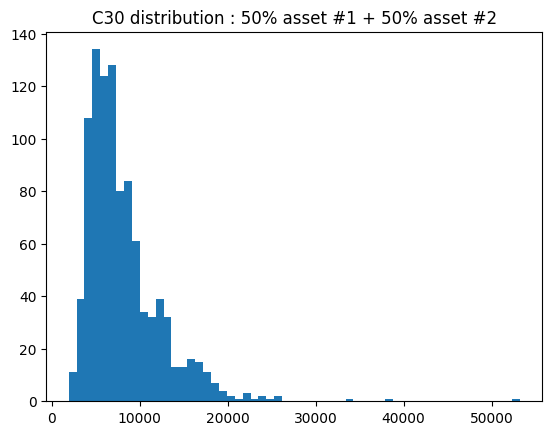

In [20]:
plt.hist(C30, bins='auto')
plt.title("C30 distribution : 50% asset #1 + 50% asset #2")
plt.show()